Using device: cuda
Train size: 60000, Test size: 10000
MLP(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
  )
)
Epoch [1/3], Loss: 0.3438
Epoch [2/3], Loss: 0.1439
Epoch [3/3], Loss: 0.0960


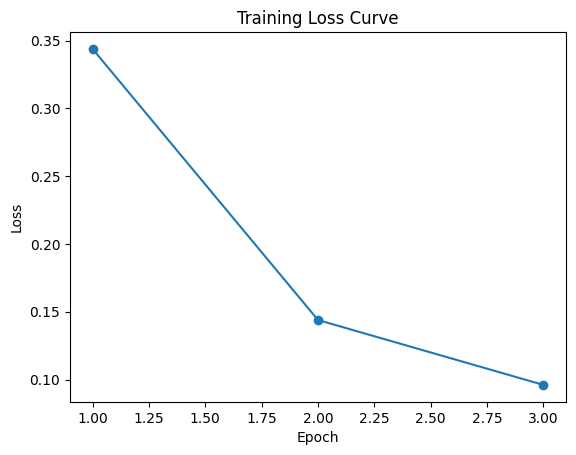

Test Accuracy: 96.86%


In [ ]:
# ====== 1. Imports ======
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ====== 2. Dataset & Loader ======
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(
    root="../data",
    train=True,
    download=True,
    transform=transform
)
test_dataset = datasets.MNIST(
    root="../data",
    train=False,
    download=True,
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

print(f"Train size: {len(train_dataset)}, Test size: {len(test_dataset)}")

# ====== 3. Define MLP Model ======
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128), nn.ReLU(),
            nn.Linear(128, 64), nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.net(x)

model = MLP().to(device)
print(model)

# ====== 4. Loss & Optimizer ======
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# ====== 5. Training Loop ======
epochs = 3
train_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for X, y in train_loader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

# ====== 6. Plot Loss Curve ======
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

# ====== 7. Evaluation ======
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        outputs = model(X)
        _, predicted = torch.max(outputs, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


In [2]:
# Save trained model
torch.save(model.state_dict(), "../data/mlp_mnist.pth")
print("Model saved at ../data/mlp_mnist.pth")


Model saved at ../data/mlp_mnist.pth
